<a href="https://colab.research.google.com/github/AishwaryaVelumani/Deep-Learning/blob/master/Multiclass_Classification_on_Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)= reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index= reuters.get_word_index()
reverse_word_index= dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[10]

3

In [8]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results= np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [9]:
x_train= vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)

In [10]:
x_test.shape

(2246, 10000)

In [11]:
def to_one_hot(labels,dimension=46):
    results= np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

In [12]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

hot_train_labels= to_categorical(train_labels)
hot_test_labels= to_categorical(test_labels)

In [14]:
from keras import models
from keras import layers
model= models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val= x_train[:1000]
partial_x_train= x_train[1000:]

y_val= hot_train_labels[:1000]
partial_y_train= hot_train_labels[1000:]

In [17]:
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=20,
                   validation_data=(x_val,y_val))

Epoch 1/20
400/400 [==============================] - 3s 8ms/step - loss: 1.3808 - accuracy: 0.6984 - val_loss: 1.0227 - val_accuracy: 0.7650
Epoch 2/20
400/400 [==============================] - 3s 8ms/step - loss: 0.7438 - accuracy: 0.8384 - val_loss: 0.8809 - val_accuracy: 0.8140
Epoch 3/20
400/400 [==============================] - 3s 8ms/step - loss: 0.4859 - accuracy: 0.8951 - val_loss: 0.8515 - val_accuracy: 0.8310
Epoch 4/20
400/400 [==============================] - 3s 8ms/step - loss: 0.3408 - accuracy: 0.9248 - val_loss: 0.9685 - val_accuracy: 0.8200
Epoch 5/20
400/400 [==============================] - 3s 8ms/step - loss: 0.2711 - accuracy: 0.9355 - val_loss: 1.0654 - val_accuracy: 0.8140
Epoch 6/20
400/400 [==============================] - 3s 8ms/step - loss: 0.2343 - accuracy: 0.9474 - val_loss: 1.1797 - val_accuracy: 0.8030
Epoch 7/20
400/400 [==============================] - 3s 8ms/step - loss: 0.2065 - accuracy: 0.9518 - val_loss: 1.4193 - val_accuracy: 0.7850
Epoch 

In [18]:
print(history)

In [19]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

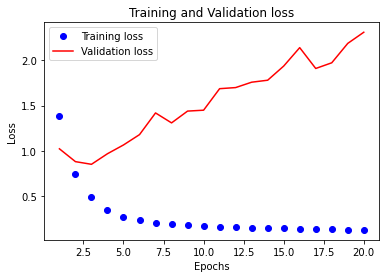

In [20]:
import matplotlib.pyplot as plt
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

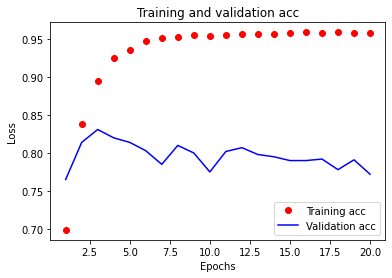

In [21]:
plt.clf()

acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

plt.plot(epochs,acc,'ro',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model= models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

results= model.evaluate(x_test,hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 2.5596 - accuracy: 0.5323 - val_loss: 1.6999 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 1s 41ms/step - loss: 1.3953 - accuracy: 0.7016 - val_loss: 1.2886 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0371 - accuracy: 0.7749 - val_loss: 1.1259 - val_accuracy: 0.7470
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8090 - accuracy: 0.8264 - val_loss: 1.0371 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6434 - accuracy: 0.8672 - val_loss: 0.9469 - val_accuracy: 0.8110
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5117 - accuracy: 0.8943 - val_loss: 0.9352 - val_accuracy: 0.7880
Epoch 7/9
16/16 [==============================] - 1s 45ms/step - loss: 0.4074 - accuracy: 0.9159 - val_loss: 0.8792 - val_accuracy: 0.8120
Epoch 8/9
16/16 [===

In [23]:
import copy
test_labels_copy= copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array= np.array(test_labels)== np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)


0.18967052537845058

In [24]:
predictions= model.predict(x_test)

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

1.0

In [27]:
np.argmax(predictions[0])

3

In [28]:
y_train= np.array(train_labels)
y_test= np.array(test_labels)

In [29]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [32]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val,y_val))

Epoch 1/20
63/63 [==============================] - 1s 18ms/step - loss: 2.9765 - accuracy: 0.2620 - val_loss: 2.2745 - val_accuracy: 0.5890
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.7465 - accuracy: 0.6206 - val_loss: 1.5515 - val_accuracy: 0.6210
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3281 - accuracy: 0.6527 - val_loss: 1.4378 - val_accuracy: 0.6320
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1534 - accuracy: 0.6726 - val_loss: 1.3695 - val_accuracy: 0.6590
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 1.0199 - accuracy: 0.7389 - val_loss: 1.3402 - val_accuracy: 0.6850
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.9130 - accuracy: 0.7643 - val_loss: 1.3552 - val_accuracy: 0.6870
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8262 - accuracy: 0.7839 - val_loss: 1.3335 - val_accuracy: 0.6960
Epoch 8/20
63